In [1]:
from time import time
import multiprocessing
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from glob import glob
import skimage
import torch
import SimpleITK as sitk
import skimage, torch, torchvision
import torchxrayvision as xrv
import torchvision
import torchxrayvision as xrv
import matplotlib.pyplot as plt
import sys
import warnings
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
import random
import logging
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve,auc,accuracy_score,classification_report,confusion_matrix
import tensorflow as tf
from keras.models import load_model
from tensorflow import keras
from sklearn.model_selection import train_test_split

2023-10-15 19:46:32.113673: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def ROC_CURVE_3CAT(test_y,prob_test_vec):
    n_classes = 3
    fpr = [0] * 3
    tpr = [0] * 3
    thresholds = [0] * 3
    auc_score = [0] * 3
    lbls = ['White','African-American','Asian']
    for i in range(n_classes):
        fpr[i], tpr[i], thresholds[i] = roc_curve(test_y[:, i],
                                                prob_test_vec[:, i])
        auc_score[i] = auc(fpr[i], tpr[i])
        
    plt.figure(dpi=150)
    for i in range(n_classes):
        
        plt.plot(fpr[i], tpr[i], label='ROC curve for {} (area = {:0.2f})'.format(lbls[i],auc_score[i]) )
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
    plt.grid(which='both')
    plt.show()
    classes_pred = np.argmax(prob_test_vec,axis=1)
    actual_class = np.argmax(test_y,axis=1)

    print(classification_report(y_true=actual_class, y_pred=classes_pred))
    cm = confusion_matrix(y_true=actual_class, y_pred=classes_pred)
    print(cm)

253/253 [==============================] - 0s 1ms/step


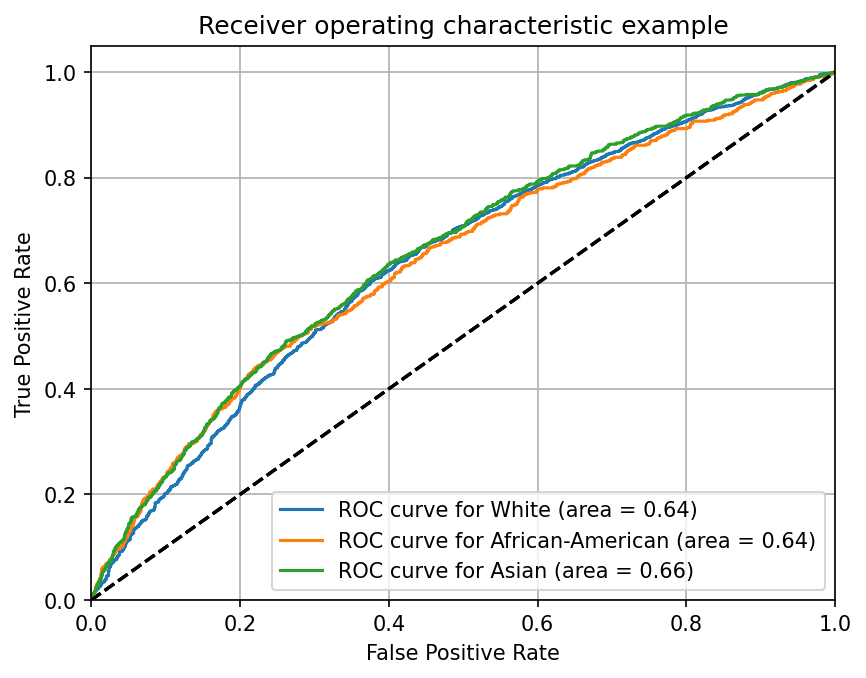

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      6662
           1       0.16      0.12      0.14       570
           2       0.24      0.19      0.21       849

    accuracy                           0.76      8081
   macro avg       0.41      0.40      0.40      8081
weighted avg       0.73      0.76      0.74      8081

[[5895  298  469]
 [ 449   68   53]
 [ 632   56  161]]


In [4]:
# chexpert age ful model eevaluated by NIH
name = 'mimic_race_3categ_full_'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/chexpert_race_3categ_full_belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)


253/253 [==============================] - 0s 950us/step


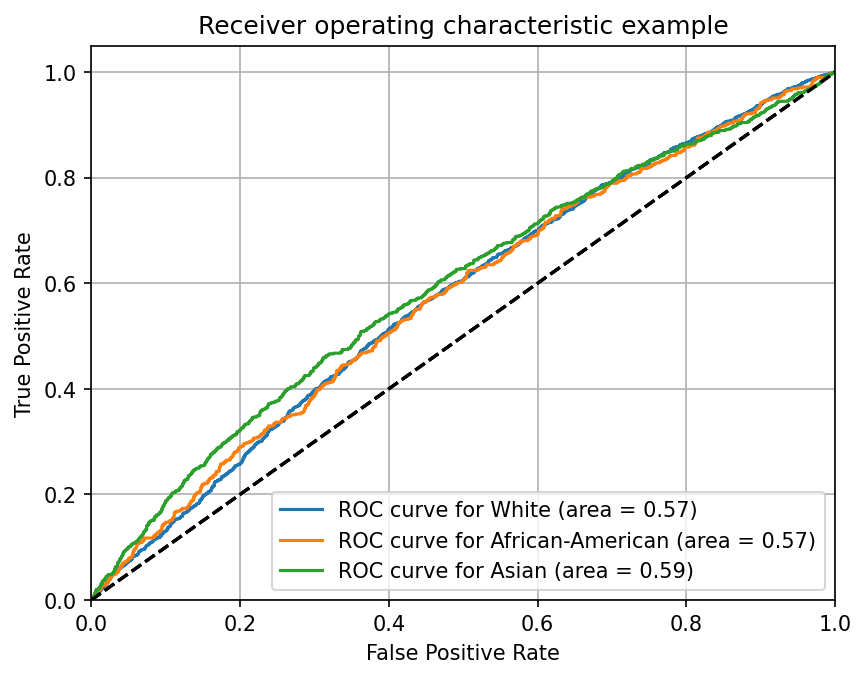

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      6662
           1       0.11      0.04      0.06       570
           2       0.17      0.13      0.15       849

    accuracy                           0.76      8081
   macro avg       0.37      0.36      0.36      8081
weighted avg       0.71      0.76      0.73      8081

[[5975  183  504]
 [ 485   24   61]
 [ 716   19  114]]


In [5]:
# chexpert age ful model eevaluated by NIH
name = 'mimic_race_3categ_segment_0__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/chexpert_race_3categ_segment_segment_0__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)


253/253 [==============================] - 0s 1ms/step


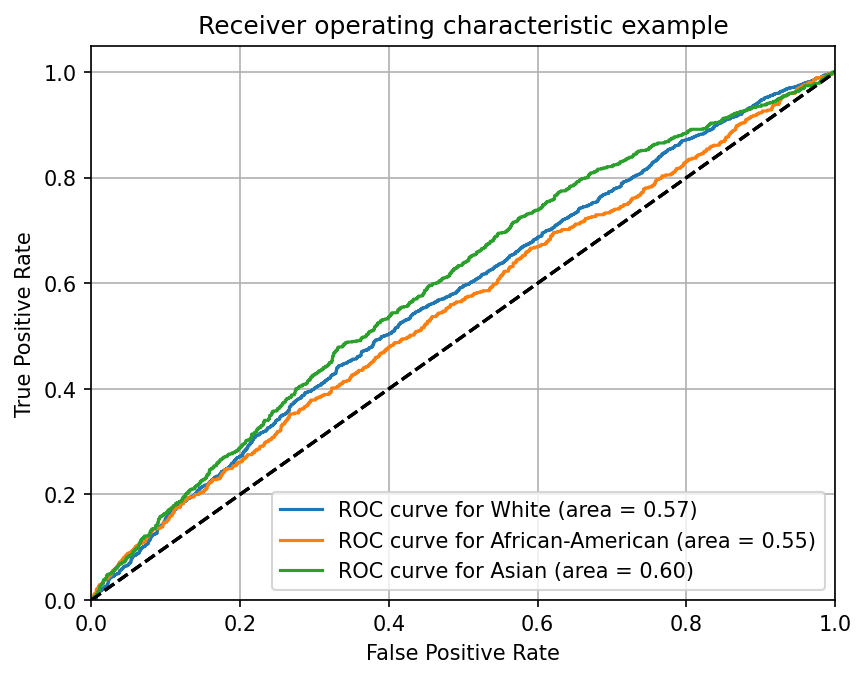

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6662
           1       0.15      0.04      0.06       570
           2       0.18      0.07      0.10       849

    accuracy                           0.79      8081
   macro avg       0.39      0.35      0.35      8081
weighted avg       0.71      0.79      0.75      8081

[[6329   97  236]
 [ 513   20   37]
 [ 777   13   59]]


In [6]:
# chexpert age ful model eevaluated by NIH
name = 'mimic_race_3categ_segment_1__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/chexpert_race_3categ_segment_segment_1__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)


253/253 [==============================] - 0s 1ms/step


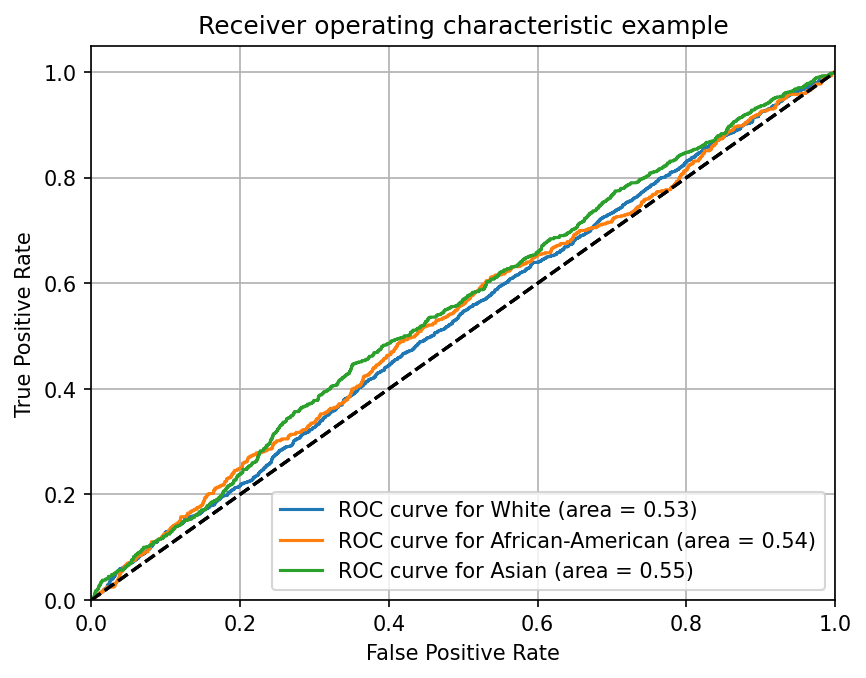

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6662
           1       0.08      0.02      0.03       570
           2       0.14      0.06      0.08       849

    accuracy                           0.78      8081
   macro avg       0.35      0.34      0.33      8081
weighted avg       0.70      0.78      0.74      8081

[[6258  122  282]
 [ 531   12   27]
 [ 774   25   50]]


In [7]:
# chexpert age ful model eevaluated by NIH
name = 'mimic_race_3categ_segment_2__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/chexpert_race_3categ_segment_segment_2__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)


253/253 [==============================] - 0s 929us/step


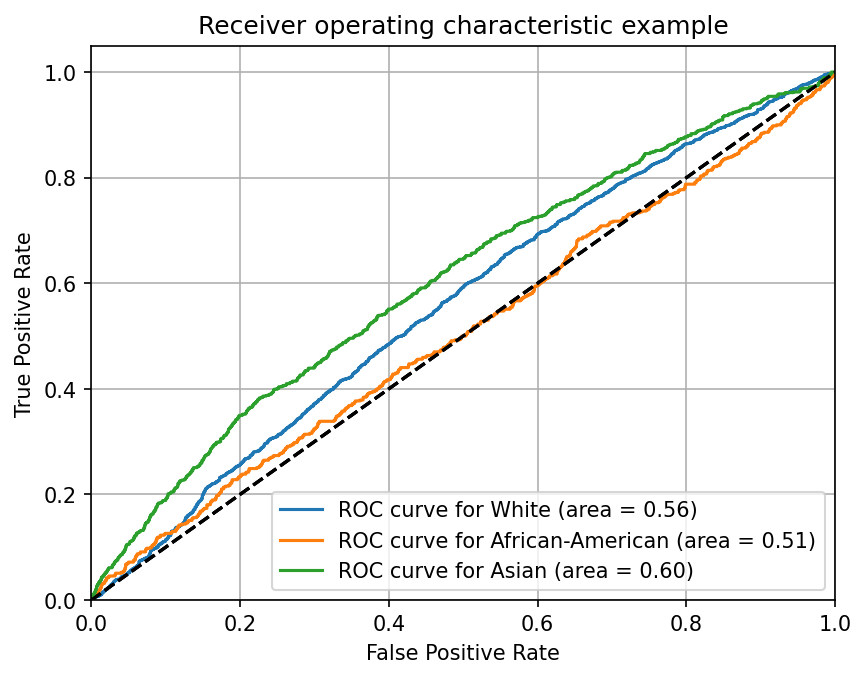

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      6662
           1       0.08      0.07      0.07       570
           2       0.19      0.14      0.16       849

    accuracy                           0.74      8081
   macro avg       0.37      0.36      0.36      8081
weighted avg       0.71      0.74      0.72      8081

[[5785  382  495]
 [ 489   38   43]
 [ 677   49  123]]


In [8]:
# chexpert age ful model eevaluated by NIH
name = 'mimic_race_3categ_segment_3__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/chexpert_race_3categ_segment_segment_3__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)


339/339 [==============================] - 0s 991us/step


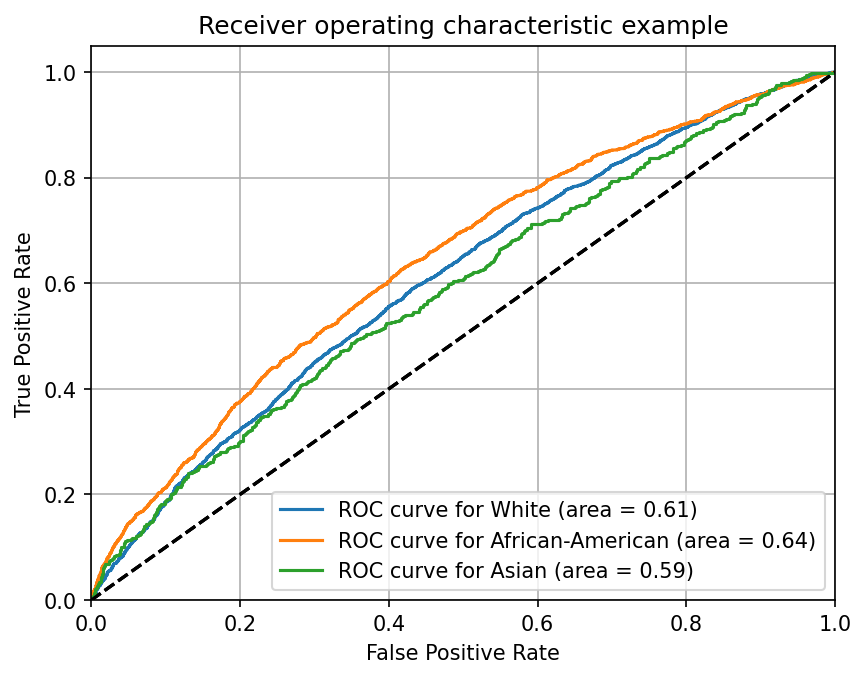

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      8484
           1       0.31      0.21      0.25      1884
           2       0.12      0.06      0.08       465

    accuracy                           0.73     10833
   macro avg       0.41      0.39      0.39     10833
weighted avg       0.69      0.73      0.70     10833

[[7465  860  159]
 [1433  402   49]
 [ 405   31   29]]


In [10]:
# chexpert age ful model eevaluated by NIH
name = 'chexpert_race_3categ_full_'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/mimic_race_3categ_full_belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)


339/339 [==============================] - 0s 959us/step


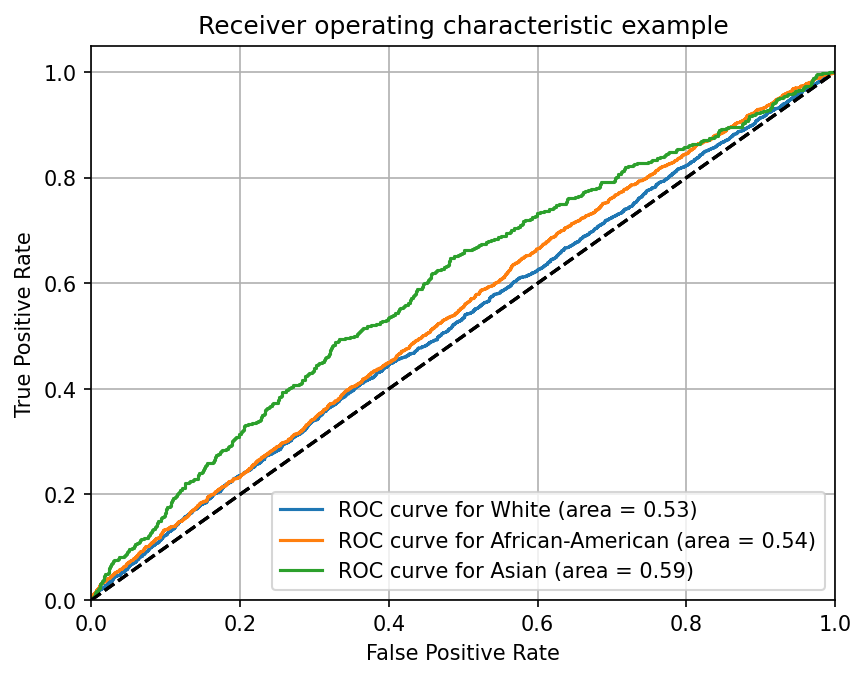

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      8484
           1       0.22      0.08      0.11      1884
           2       0.08      0.03      0.04       465

    accuracy                           0.74     10833
   macro avg       0.36      0.34      0.34     10833
weighted avg       0.66      0.74      0.69     10833

[[7863  503  118]
 [1716  144   24]
 [ 436   16   13]]


In [12]:
# chexpert age ful model eevaluated by NIH
name = 'chexpert_race_3categ_segment_segment_0__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/mimic_race_3categ_segment_0__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)


339/339 [==============================] - 0s 935us/step


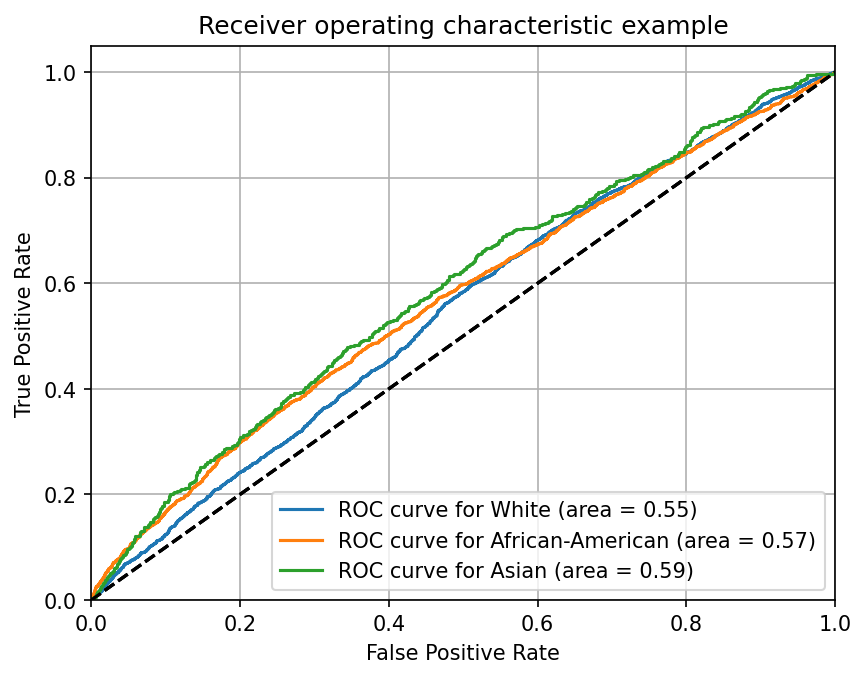

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      8484
           1       0.26      0.13      0.17      1884
           2       0.08      0.03      0.04       465

    accuracy                           0.74     10833
   macro avg       0.38      0.35      0.35     10833
weighted avg       0.67      0.74      0.69     10833

[[7720  651  113]
 [1619  242   23]
 [ 422   31   12]]


In [13]:
# chexpert age ful model eevaluated by NIH
name = 'chexpert_race_3categ_segment_segment_1__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/mimic_race_3categ_segment_1__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)


339/339 [==============================] - 0s 906us/step


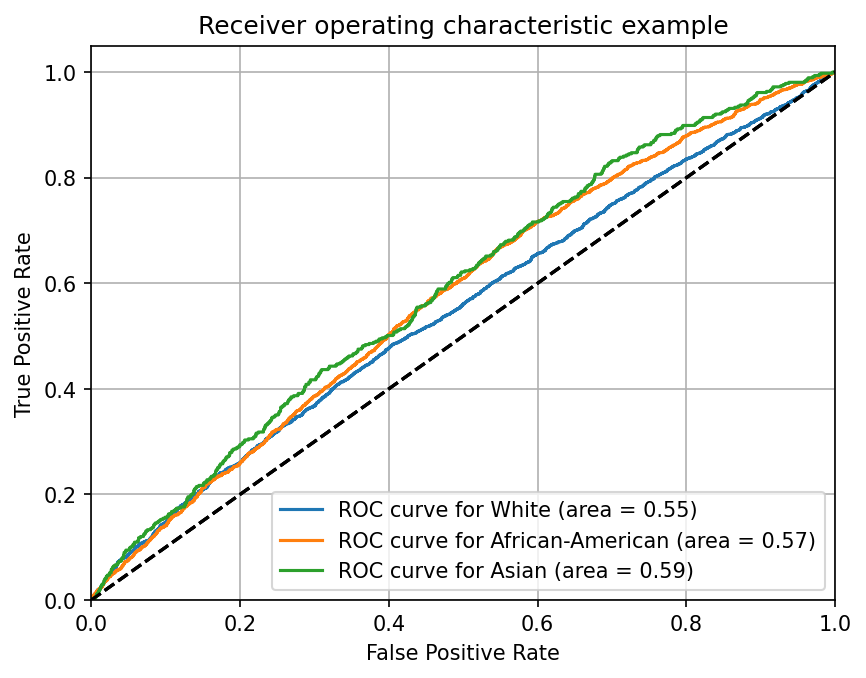

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      8484
           1       0.23      0.09      0.12      1884
           2       0.08      0.03      0.04       465

    accuracy                           0.74     10833
   macro avg       0.36      0.35      0.34     10833
weighted avg       0.66      0.74      0.69     10833

[[7820  533  131]
 [1700  162   22]
 [ 431   21   13]]


In [14]:
# chexpert age ful model eevaluated by NIH
name = 'chexpert_race_3categ_segment_segment_2__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/mimic_race_3categ_segment_2__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)


339/339 [==============================] - 0s 910us/step


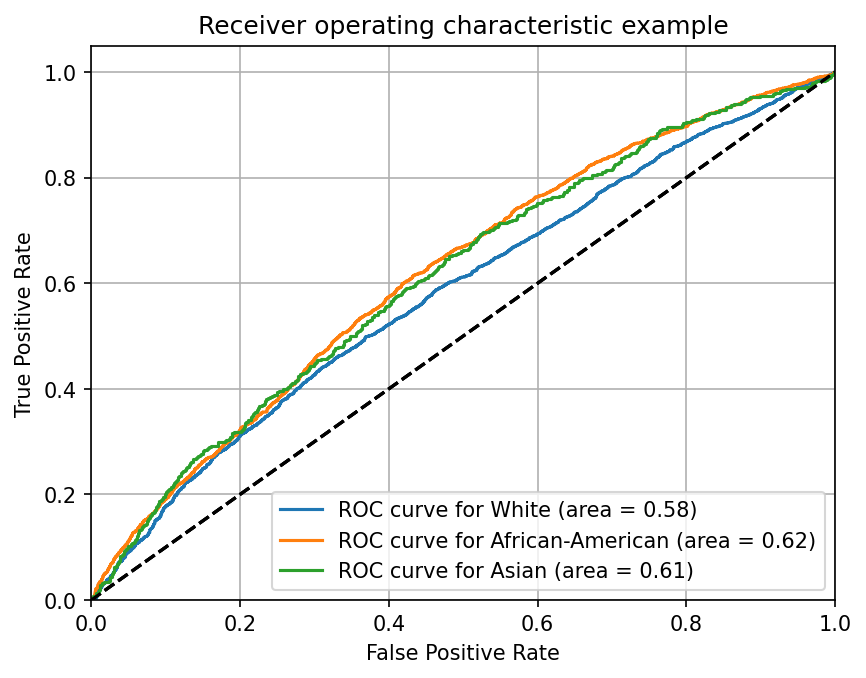

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      8484
           1       0.29      0.19      0.22      1884
           2       0.07      0.03      0.04       465

    accuracy                           0.73     10833
   macro avg       0.38      0.37      0.37     10833
weighted avg       0.68      0.73      0.70     10833

[[7513  840  131]
 [1514  349   21]
 [ 419   34   12]]


In [15]:
# chexpert age ful model eevaluated by NIH
name = 'chexpert_race_3categ_segment_segment_3__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/mimic_race_3categ_segment_3__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)
